In [2]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
# from tqdm import tqdm

from feature_extractor.config import *

In [3]:
fig_path = DATA_DIR_PATH / "figure" / TEST_NAME
fig_path = fig_path.absolute().as_posix() + "_fig"

video_path = DATA_DIR_PATH / "video" / TEST_NAME
video_path = video_path.absolute().as_posix() + "_video.mp4"

if SAVE_DATA:
    pickle_path = DATA_DIR_PATH / "pickle" / TEST_NAME
    pickle_path = pickle_path.absolute().as_posix() + "_keypoints.pkl"

    file = open(pickle_path, 'rb')
    keypoints_list: list[np.ndarray] = pickle.load(file)
    mask_list: list[np.ndarray] = pickle.load(file)
    keypoints_no_Kalman_list: list[np.ndarray] = pickle.load(file)
    file.close()

if SAVE_YOLO_IMG:
    pickle_path = DATA_DIR_PATH / "pickle" / TEST_NAME
    pickle_path = pickle_path.absolute().as_posix() + "_YOLOimgs.pkl"

    file = open(pickle_path, 'rb')
    YOLO_plot_list: list[np.ndarray] = pickle.load(file)
    file.close()

In [3]:
error_idx_list = [112, 115, 192, 203, 207, 210, 217, 220, 233, 270]
# keypoints_list, keypoints_no_Kalman_list, mask_list
for idx in error_idx_list:
    print(f"{idx}:\nMask:{mask_list[idx]}\nKalman:\n{keypoints_list[idx]}\nNo Kalman:\n{keypoints_no_Kalman_list[idx]}")
    input()

112:
Mask:[[ True False  True False  True  True False False  True False  True  True
   True  True  True  True  True]]
Kalman:
[[[-0.10266831  0.46704598  2.00200963]
  [ 0.17740943 -1.01686843  2.45577669]
  [-0.0700181   0.39684042  1.84026301]
  [ 0.17740943 -1.01686843  2.45577669]
  [ 0.04049657  0.39806415  1.79098189]
  [-0.002923    0.08228105  0.252453  ]
  [ 0.12076821  0.56513883  1.6717248 ]
  [ 0.17740943 -1.01686843  2.45577669]
  [ 0.09366429  0.84667392  1.681638  ]
  [ 0.17740943 -1.01686843  2.45577669]
  [ 0.04955082  1.04590567  1.63363421]
  [-0.05323157  1.06571844  1.82145751]
  [ 0.06206981  0.98137694  1.63118744]
  [-0.15909519  1.41081043  1.91067243]
  [ 0.08033931  1.3430142   1.71390224]
  [-0.04285051  1.81414608  1.99263525]
  [ 0.11019802  1.7152953   1.76838517]]]
No Kalman:
[[[-0.10266831  0.46704598  2.00200963]
  [ 0.17740943 -1.01686843  2.45577669]
  [-0.0700181   0.39684042  1.84026301]
  [ 0.17740943 -1.01686843  2.45577669]
  [ 0.04049657  0.398

In [9]:
class a:
    b = 1

import numpy as np

a = np.sum(np.arange(12).reshape(6,2), axis=1)
b = a.copy()
b[0] = 1111

a

array([ 1,  5,  9, 13, 17, 21])

In [1]:
%load_ext autoreload
%autoreload 2

import pickle
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
# from tqdm import tqdm

from feature_extractor.config import *
from feature_extractor.Outlier_filter import find_inliers

fig_path = DATA_DIR_PATH / "figure" / TEST_NAME
fig_path = fig_path.absolute().as_posix() + "_fig"

video_path = DATA_DIR_PATH / "video" / TEST_NAME
video_path = video_path.absolute().as_posix() + "_video.mp4"

if SAVE_DATA:
    pickle_path = DATA_DIR_PATH / "pickle" / TEST_NAME
    pickle_path = pickle_path.absolute().as_posix() + "_keypoints.pkl"

    file = open(pickle_path, 'rb')
    keypoints_list: list[np.ndarray] = pickle.load(file)
    mask_list: list[np.ndarray] = pickle.load(file)
    keypoints_no_Kalman_list: list[np.ndarray] = pickle.load(file)
    file.close()

if SAVE_YOLO_IMG:
    pickle_path = DATA_DIR_PATH / "pickle" / TEST_NAME
    pickle_path = pickle_path.absolute().as_posix() + "_YOLOimgs.pkl"

    file = open(pickle_path, 'rb')
    YOLO_plot_list: list[np.ndarray] = pickle.load(file)
    file.close()
    
error_idx_list = [112, 115, 192, 203, 207, 210, 217, 220, 233, 270]
idx = 115

data_KD = keypoints_list[idx][0]
mask_K = mask_list[idx][0]
print(data_KD.shape, mask_K.shape)
inliers_mask, geo_center = find_inliers(data_KD=data_KD, mask_K=mask_K)

inliers_mask.shape

(17, 3) (17,)


(17,)

In [1]:
import numpy as np
# from typing import Tuple

def find_inliers() -> tuple[np.ndarray, np.ndarray]:
    return np.array([1,2,3]), np.array([4,5,6])

a = find_inliers()
print(a)

(array([1, 2, 3]), array([4, 5, 6]))


In [3]:
import glob
import re

from feature_extractor.config import *

fig_path = DATA_DIR_PATH / "figure" / TEST_NAME
fig_path = fig_path.absolute().as_posix() + "_fig"

video_path = DATA_DIR_PATH / "video" / TEST_NAME
video_path = video_path.absolute().as_posix() + "_video.mp4"

pattern = f"{fig_path}*.png"
files = glob.glob(pattern)

def extract_number(filename):
    match = re.search(r"(\d+)\.png$", filename)
    return int(match.group(1)) if match else 0

files_sorted = sorted(files, key=extract_number)
print(files_sorted)

['/home/xmo/socialnav_xmo/feature_extractor/data/figure/test_Outliers_True_fig0.png', '/home/xmo/socialnav_xmo/feature_extractor/data/figure/test_Outliers_True_fig1.png', '/home/xmo/socialnav_xmo/feature_extractor/data/figure/test_Outliers_True_fig2.png', '/home/xmo/socialnav_xmo/feature_extractor/data/figure/test_Outliers_True_fig3.png', '/home/xmo/socialnav_xmo/feature_extractor/data/figure/test_Outliers_True_fig4.png', '/home/xmo/socialnav_xmo/feature_extractor/data/figure/test_Outliers_True_fig5.png', '/home/xmo/socialnav_xmo/feature_extractor/data/figure/test_Outliers_True_fig6.png', '/home/xmo/socialnav_xmo/feature_extractor/data/figure/test_Outliers_True_fig7.png', '/home/xmo/socialnav_xmo/feature_extractor/data/figure/test_Outliers_True_fig8.png', '/home/xmo/socialnav_xmo/feature_extractor/data/figure/test_Outliers_True_fig9.png', '/home/xmo/socialnav_xmo/feature_extractor/data/figure/test_Outliers_True_fig10.png', '/home/xmo/socialnav_xmo/feature_extractor/data/figure/test_Out

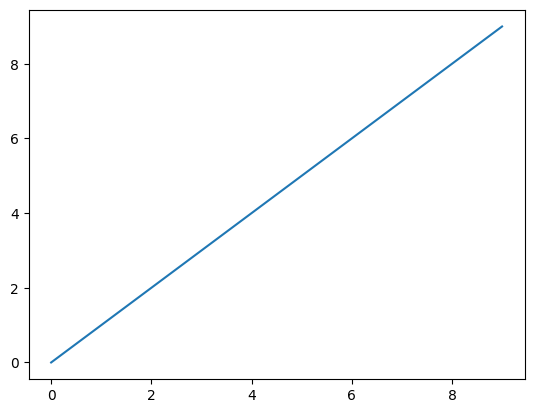

In [3]:
from matplotlib import pyplot as plt
import numpy as np

plt.plot(np.arange(10))
plt.show()